# Mask Segmentation Model

In [1]:
import tensorflow as tf
import mrcnn
import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import cv2
import os
import numpy as np

from sklearn.metrics import confusion_matrix
import seaborn as sns
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

CLASS_NAMES = ['BG','Story']

Using TensorFlow backend.


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus: 
    # Restrict TensorFlow to only allocate memory on the first GPU
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU Available")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

GPU Available


In [3]:
class SimpleConfig(mrcnn.config.Config):
    # Give the configuration a recognizable name
    NAME = "coco_inference"
    # set the number of GPUs to use along with the number of images per GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

	# Number of classes = number of classes + 1 (+1 for the background). The background class is named BG
    NUM_CLASSES = len(CLASS_NAMES)
    # number of training steps per epoch
    STEPS_PER_EPOCH = 100
    DETECTION_MIN_CONFIDENCE = 0.90 # Skip detections with < 90% confidence
    WEIGHT_DECAY = 0.00001
    RPN_NMS_THRESHOLD = 0.6
    RPN_ANCHOR_RATIOS = [1.5, 2.0, 2.5] 

# Initialize the Mask R-CNN model for inference and then load the weights.
model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

In [4]:
# Load the weights into the model.
model.load_weights(filepath="Path/Number_of_Stories/mask_rcnn_ns_cfg_coco_def.h5", by_name=True)

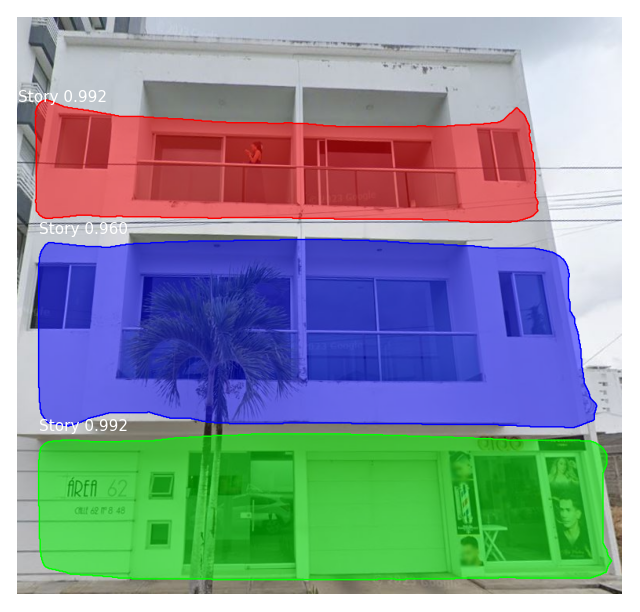

<Figure size 400x300 with 0 Axes>

N° Stories:  3


In [5]:
# Crear un diccionario con 11 clases y listas vacías
ns_class = ["NS_0","NS_1","NS_2","NS_3","NS_4","NS_5","NS_6","NS_7","NS_8","NS_9","NS_10+"]
prob_story = {
    'NS_0': [],
    'NS_1': [],
    'NS_2': [],
    'NS_3': [],
    'NS_4': [],
    'NS_5': [],
    'NS_6': [],
    'NS_7': [],
    'NS_8': [],
    'NS_9': [],
    'NS_10+': []
}

prob_ns_out = pd.DataFrame()

###############
###############
###############
images_id_path = "path/image.jpg"
image = cv2.imread(images_id_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Perform a forward pass of the network to obtain the results
r = model.detect([image], verbose=0)
# Get the results for the first image.
r = r[0]

r_mask = r["masks"]
captions = []

for i in range (r_mask.shape[-1]):
    captions.append(i)

#stories = [0, 1, 2, 3, 4, 5, 7, 8]
#r_mask = r["masks"]
#r_mask = r_mask[:, :, stories]

# Visualize the detected objects.
mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'],
                                  masks=r_mask, 
                                  class_ids=r['class_ids'],
                                  class_names=CLASS_NAMES, 
                                  scores = r['scores'], 
                                  show_bbox=False)

print("N° Stories: ",r['scores'].shape[0])

ns = r['scores'].shape[0]
if ns > 10:
    ns = 10

prob_story[ns_class[ns]].append(1)